In [1]:
Tasmia = "In the name of Allah, the Most Benoficient, the Most Merciful"
print(Tasmia)

In the name of Allah, the Most Benoficient, the Most Merciful


### Import Libraries

In [63]:
import re
import numpy as np
import pandas as pd
import spacy
spacy.load("en_core_web_sm")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix


import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from gensim.models.tfidfmodel import TfidfModel

import matplotlib.pyplot as plt
import seaborn as sns

### Introduction to regular expressions

In [3]:
word_regex = "\w+"

re.match(word_regex, "hi there!")

<re.Match object; span=(0, 2), match='hi'>

In [4]:
re.split("\s+", "Spilt on spaces.")

['Spilt', 'on', 'spaces.']

**Find words**

In [5]:
my_string = "Let write RegEx!"

In [6]:
re.findall(r"\w+", my_string)

['Let', 'write', 'RegEx']

**Practicing regular expressions: re.split() and re.findall()**

In [7]:
string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

In [8]:
# Write a pattern to match sentence endings
s_exp = r"[\.?!]"

re.split(s_exp, string)

["Let's write RegEx",
 "  Won't that be fun",
 '  I sure think so',
 '  Can you find 4 sentences',
 '  Or perhaps, all 19 words',
 '']

In [9]:
# Find all capitalized words in my_string and print the result
c_exp = r"[A-Z]\w+"

re.findall(c_exp, string)

['Let', 'RegEx', 'Won', 'Can', 'Or']

In [10]:
# Split my_string on spaces and print the result
sp_exp = r"\s+"

re.split(sp_exp, string)

["Let's",
 'write',
 'RegEx!',
 "Won't",
 'that',
 'be',
 'fun?',
 'I',
 'sure',
 'think',
 'so.',
 'Can',
 'you',
 'find',
 '4',
 'sentences?',
 'Or',
 'perhaps,',
 'all',
 '19',
 'words?']

In [11]:
# Find all digits in my_string and print the result
d_exp = "\d+"

re.findall(d_exp, string)

['4', '19']

### Introduction to tokenization

In [12]:
greetings = "Assalam-o-Alaikum! How are you?"

word_tokenize(greetings)

['Assalam-o-Alaikum', '!', 'How', 'are', 'you', '?']

In [13]:
exp = r"\s+"

re.split(exp, greetings)

['Assalam-o-Alaikum!', 'How', 'are', 'you?']

**Word tokenization with NLTK**

In [14]:
scene_one = "SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a temperate zone.\nARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?\nSOLDIER #1: Are you suggesting coconuts migrate?\nARTHUR: Not at all.  They could be carried.\nSOLDIER #1: What?  A swallow carrying a coconut?\nARTHUR: It could grip it by the husk!\nSOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.\nARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.\nSOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?\nARTHUR: Please!\nSOLDIER #1: Am I right?\nARTHUR: I'm not interested!\nSOLDIER #2: It could be carried by an African swallow!\nSOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.\nSOLDIER #2: Oh, yeah, I agree with that.\nARTHUR: Will you ask your master if he wants to join my court at Camelot?!\nSOLDIER #1: But then of course a-- African swallows are non-migratory.\nSOLDIER #2: Oh, yeah...\nSOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] \nSOLDIER #2: Wait a minute!  Supposing two swallows carried it together?\nSOLDIER #1: No, they'd have to have it on a line.\nSOLDIER #2: Well, simple!  They'd just use a strand of creeper!\nSOLDIER #1: What, held under the dorsal guiding feathers?\nSOLDIER #2: Well, why not?\n"

In [15]:
# Split scene_onne into sentences: sentences

sentences = sent_tokenize(scene_one)
sentences

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!',
 '[clop clop clop] \nSOLDIER #1: Halt!',
 'Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.',
 'King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.',
 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.',
 'I must speak with your lord and master.',
 'SOLDIER #1: What?',
 'Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?',
 "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.",
 'ARTHUR: So?',
 "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?",
 'ARTHUR: We found them.',
 'SOLDIER #1: Found them?',
 'In Mercea?',
 "The coconut's tropic

In [16]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent

words_4 = word_tokenize(sentences[3])
words_4

['ARTHUR',
 ':',
 'It',
 'is',
 'I',
 ',',
 'Arthur',
 ',',
 'son',
 'of',
 'Uther',
 'Pendragon',
 ',',
 'from',
 'the',
 'castle',
 'of',
 'Camelot',
 '.']

In [17]:
# Make a set of unique tokens in the entire scene:
unique_tokens = set(word_tokenize(scene_one))
unique_tokens

{'!',
 '#',
 "'",
 "'d",
 "'em",
 "'m",
 "'re",
 "'s",
 "'ve",
 ',',
 '--',
 '.',
 '...',
 '1',
 '2',
 ':',
 '?',
 'A',
 'ARTHUR',
 'African',
 'Am',
 'Are',
 'Arthur',
 'Britons',
 'But',
 'Camelot',
 'Court',
 'England',
 'European',
 'Found',
 'Halt',
 'I',
 'In',
 'It',
 'KING',
 'King',
 'Listen',
 'Mercea',
 'No',
 'Not',
 'Oh',
 'Patsy',
 'Pendragon',
 'Please',
 'Pull',
 'Ridden',
 'SCENE',
 'SOLDIER',
 'Saxons',
 'So',
 'Supposing',
 'That',
 'The',
 'They',
 'Uther',
 'Wait',
 'We',
 'Well',
 'What',
 'Where',
 'Who',
 'Whoa',
 'Will',
 'Yes',
 'You',
 '[',
 ']',
 'a',
 'agree',
 'air-speed',
 'all',
 'am',
 'an',
 'and',
 'anyway',
 'are',
 'ask',
 'at',
 'back',
 'bangin',
 'be',
 'beat',
 'bird',
 'breadth',
 'bring',
 'but',
 'by',
 'carried',
 'carry',
 'carrying',
 'castle',
 'climes',
 'clop',
 'coconut',
 'coconuts',
 'could',
 'course',
 'court',
 'covered',
 'creeper',
 'defeator',
 'do',
 'does',
 'dorsal',
 'empty',
 'every',
 'feathers',
 'five',
 'fly',
 'forty-

In [18]:
# More regex with re.search()

re.search("coconut", scene_one)

<re.Match object; span=(580, 587), match='coconut'>

In [19]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern = r"[\w+]+:"

re.match(pattern, sentences[3])

<re.Match object; span=(0, 7), match='ARTHUR:'>

### Find the script notation at the beginning of the fourth sentence and print it

In [20]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

In [21]:
pattern = r"(\w+|#\d|\?|!)"

In [22]:
regexp_tokenize(my_string, pattern)

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

In [23]:
tweets = ['This is the best #nlp exercise ive found online! #python', 
          '#NLP is super fun! <3 #learning', 
          'Thanks @datacamp :) #nlp #python']

In [24]:
pattern = "#\w+"

In [25]:
regexp_tokenize(tweets[0], pattern)

['#nlp', '#python']

**Extract Mentions and Tweets**

In [26]:
pattern2 = r"[@#]\w+"

regexp_tokenize(tweets[-1], pattern2)

['@datacamp', '#nlp', '#python']

In [27]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()

all_tokens = [tknzr.tokenize(t) for t in tweets]
all_tokens

[['This',
  'is',
  'the',
  'best',
  '#nlp',
  'exercise',
  'ive',
  'found',
  'online',
  '!',
  '#python'],
 ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'],
 ['Thanks', '@datacamp', ':)', '#nlp', '#python']]

### Non-ascii tokenization

In [28]:
german_text = "Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕"

In [29]:
# Tokenize and print all words in german_text
word_tokenize(german_text)

['Wann',
 'gehen',
 'wir',
 'Pizza',
 'essen',
 '?',
 '🍕',
 'Und',
 'fährst',
 'du',
 'mit',
 'Über',
 '?',
 '🚕']

In [30]:
# Tokenize and print only capital words
C = r"[(A-Z|Ü)]\w+"

regexp_tokenize(german_text, C)

['Wann', 'Pizza', 'Und', 'Über']

In [31]:
# Tokenize and print only emoji
e = r"[^(A-Za-z|0-9|?|\s|Üä)]"

regexp_tokenize(german_text, e)

['🍕', '🚕']

### Charting practice

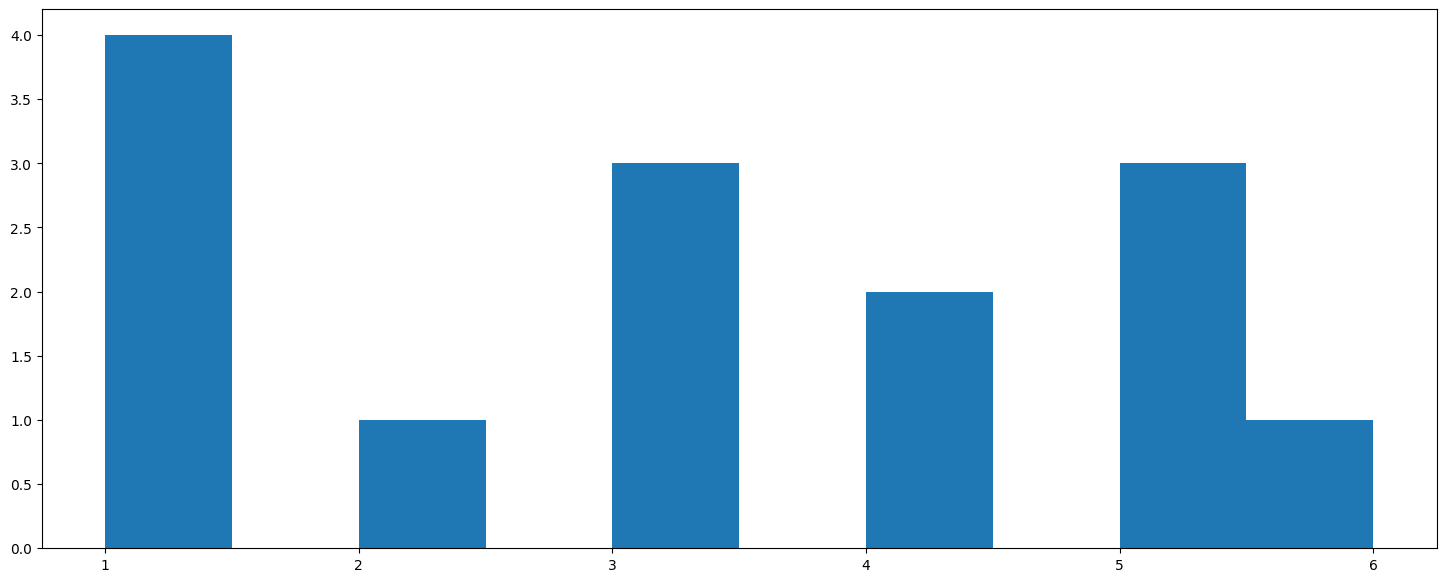

In [32]:
words = word_tokenize(german_text)

len_words = [len(w) for w in words]
plt.figure(figsize = (18, 7))
plt.hist(len_words)
plt.show()

### Charting practice

In [33]:
f = open("grail.txt", "r")
gril = f.read()
print(gril)

SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!
SOLDIER #1: Pull the other one!
ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.
SOLDIER #1: What?  Ridden on a horse?
ARTHUR: Yes!
SOLDIER #1: You're using coconuts!
ARTHUR: What?
SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.
ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--
SOLDIER #1: Where'd you get the coconuts?
ARTHUR: We found them.
SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!
ARTHUR: What do you mean?
SOLDIER #1: Well, this is a temperate zone.
AR

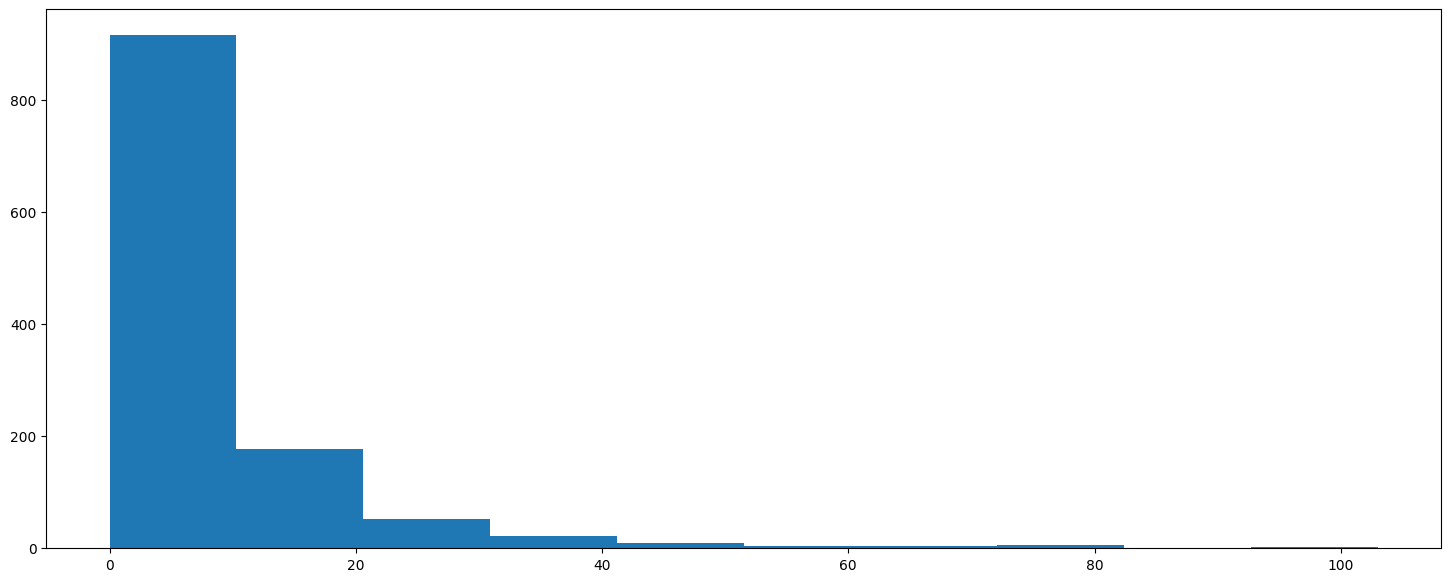

In [34]:
# Split the script into lines: lines
lines = gril.split("\n")

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, "", l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.figure(figsize = (18, 7))
plt.hist(line_num_words)

# Show the plot
plt.show()

### Word counts with bag-of-words

In [35]:
x = Counter(word_tokenize(german_text))
x

Counter({'Wann': 1,
         'gehen': 1,
         'wir': 1,
         'Pizza': 1,
         'essen': 1,
         '?': 2,
         '🍕': 1,
         'Und': 1,
         'fährst': 1,
         'du': 1,
         'mit': 1,
         'Über': 1,
         '🚕': 1})

In [36]:
x.most_common(1)

[('?', 2)]

In [37]:
Counter(word_tokenize("The cat is in the box. The cat box."))

Counter({'The': 2, 'cat': 2, 'is': 1, 'in': 1, 'the': 1, 'box': 2, '.': 2})

### Building a Counter with bag-of-words

In [38]:
# Tokenize the article: tokens
tokens = word_tokenize(gril)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

print(bow_simple.most_common(10))

[(':', 1197), ('.', 838), ('!', 830), (',', 746), ('the', 333), ('[', 320), (']', 320), ('you', 263), ('arthur', 261), ('i', 260)]


In [39]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords.words("english")]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

bow = Counter(lemmatized)
print(bow.most_common(10))

[('arthur', 261), ('knight', 149), ('oh', 112), ('launcelot', 101), ('galahad', 80), ('father', 75), ('sir', 71), ('bedevere', 67), ('guard', 65), ('head', 65)]


### NER with NLTK

In [40]:
article = 'The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'

In [41]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


### Comparing NLTK with spaCy NER

In [42]:
# Instantiate the English model: nlp
nlp = spacy.load("en_core_web_sm")

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label, ent.text)

383 Apple
380 Travis Kalanick of Uber
380 Tim Cook
383 Apple
397 Millions
385 Silicon Valley
383 Yahoo
380 Marissa Mayer
394 186


### CountVectorizer for text classification

In [43]:
news = pd.read_csv("fake_or_real_news.csv")
news[:5]

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [44]:
# Feature
X = news["text"]

# Target
y = news["label"]

In [45]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [46]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words = "english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '000000031', '00000031', '0001', '0002', '000billion', '000ft', '000km']


### TfidfVectorizer for text classification

In [47]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = "english", max_df = 0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '000000031', '00000031', '0001', '0002', '000billion', '000ft', '000km']


In [48]:
# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Inspecting the vectors

In [51]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns = count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns = tfidf_vectorizer.get_feature_names())

In [52]:
count_df.head()

,00,000,0000,000000031,00000031,0001,0002,000billion,000ft,000km,...,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,القادمون,عربي
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
tfidf_df.head()

,00,000,0000,000000031,00000031,0001,0002,000billion,000ft,000km,...,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,القادمون,عربي
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


In [55]:
# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

False


### Training and testing the "fake news" model with CountVectorizer

In [56]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)

pred_c = nb_classifier.predict(count_test)

pd.DataFrame({"Actual": y_test, "Predicted": pred_c})[:10]

,Actual,Predicted
1357,FAKE,FAKE
2080,FAKE,FAKE
2718,FAKE,FAKE
812,FAKE,REAL
4886,FAKE,FAKE
4890,FAKE,FAKE
4714,REAL,REAL
1782,FAKE,FAKE
2445,REAL,REAL
3574,FAKE,FAKE


In [57]:
accuracy = accuracy_score(y_test, pred_c)
accuracy

0.898973954222573

In [58]:
# Calculate the confusion matrix: cm
confusion_matrix(y_test, pred_c, labels = ["FAKE", "REAL"])

array([[544,  84],
       [ 44, 595]], dtype=int64)

### Training and testing the "fake news" model with TfidfVectorizer

In [59]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

pred = nb_classifier.predict(tfidf_test)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred})

,Actual,Predicted
1357,FAKE,FAKE
2080,FAKE,FAKE
2718,FAKE,FAKE
812,FAKE,REAL
4886,FAKE,FAKE
...,...,...
1512,FAKE,FAKE
57,REAL,REAL
6092,REAL,REAL
3403,REAL,REAL


In [60]:
score = accuracy_score(y_test, pred)
score

0.8453038674033149

In [61]:
confusion_matrix(y_test, pred, labels = ["FAKE", "REAL"])

array([[443, 185],
       [ 11, 628]], dtype=int64)

In [66]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.9013417521704814

Alpha:  0.1
Score:  0.9068666140489345

Alpha:  0.2
Score:  0.8966061562746646

Alpha:  0.30000000000000004


E:\Anaconda\envs\Tensorflow 2\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Score:  0.8902920284135754

Alpha:  0.4
Score:  0.8823993685872139

Alpha:  0.5
Score:  0.8768745067087609

Alpha:  0.6000000000000001
Score:  0.8729281767955801

Alpha:  0.7000000000000001
Score:  0.8697711128650355

Alpha:  0.8
Score:  0.8626677190213102

Alpha:  0.9
Score:  0.8547750591949487



### Inspecting model

In [67]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_
class_labels

array(['FAKE', 'REAL'], dtype='<U4')

In [70]:
# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

print(class_labels[1], feat_with_weights[-20:])

FAKE [(-11.427792697885424, '0001'), (-11.427792697885424, '0002'), (-11.427792697885424, '000billion'), (-11.427792697885424, '000km'), (-11.427792697885424, '004s'), (-11.427792697885424, '00684'), (-11.427792697885424, '006s'), (-11.427792697885424, '007'), (-11.427792697885424, '007s'), (-11.427792697885424, '008s'), (-11.427792697885424, '009'), (-11.427792697885424, '0099'), (-11.427792697885424, '00am'), (-11.427792697885424, '00p'), (-11.427792697885424, '013c2812c9'), (-11.427792697885424, '014'), (-11.427792697885424, '01am'), (-11.427792697885424, '020'), (-11.427792697885424, '023'), (-11.427792697885424, '02714')]
REAL [(-7.674325838871158, 'states'), (-7.669291078546275, 'rubio'), (-7.620901989144237, 'voters'), (-7.611327046936233, 'bush'), (-7.593909990313556, 'republicans'), (-7.552271840134417, 'house'), (-7.542621167735772, 'percent'), (-7.462505713961692, 'people'), (-7.449825424365999, 'new'), (-7.437492659880791, 'party'), (-7.329967324539556, 'cruz'), (-7.3280570